In [1]:
import pandas as pd

df1 = pd.read_csv('Data_Class_1.csv')
df2 = pd.read_csv('Data_Class_2.csv')
df3 = pd.read_csv('Data_Class_3.csv')

df = pd.concat([df1, df2, df3], axis=0)

df.reset_index(drop=True, inplace=True)

print(df.head())


   Id  Altitude  Slope_Orientation  Slope  Horizontal_Distance_To_Water  \
0  41      2699                347      3                             0   
1  52      2739                323     25                            85   
2  53      2696                 72      2                            30   
3  56      2722                315     24                            30   
4  68      2919                 13     13                            90   

   Vertical_Distance_To_Water  Horizontal_Distance_To_Roadways  \
0                           0                             2096   
1                          43                             3118   
2                           0                             3271   
3                          19                             3216   
4                           6                             5321   

   Shadow_Index_9h  Shadow_Index_12h  Shadow_Index_15h  \
0              213               234               159   
1              149               205

In [46]:
df.shape

(5184, 18)

In [47]:
# Generate descriptive statistics for the dataset
print(df.describe())


                 Id     Altitude  Slope_Orientation        Slope  \
count   5184.000000  5184.000000        5184.000000  5184.000000   
mean    7510.204861  2843.550926         161.878665    15.517554   
std     4624.413034   357.981922         111.928353     8.307825   
min        3.000000  1903.000000           0.000000     1.000000   
25%     2978.500000  2561.750000          63.000000     9.000000   
50%     8273.500000  2935.000000         137.000000    14.000000   
75%    11262.250000  3136.250000         271.000000    21.000000   
max    15118.000000  3675.000000         360.000000    47.000000   

       Horizontal_Distance_To_Water  Vertical_Distance_To_Water  \
count                   5184.000000                 5184.000000   
mean                     256.798997                   49.864198   
std                      199.066593                   57.863126   
min                        0.000000                 -146.000000   
25%                      108.000000                 

In [48]:
data_info = pd.DataFrame({
    'Data Type': df.dtypes,
    'Missing Values': df.isnull().sum(),
    'Unique Values': df.nunique()
})

data_info

,Data Type,Missing Values,Unique Values
Id,int64,0,5184
Altitude,int64,0,1359
Slope_Orientation,int64,0,361
Slope,int64,0,46
Horizontal_Distance_To_Water,int64,0,290
Vertical_Distance_To_Water,int64,0,338
Horizontal_Distance_To_Roadways,int64,0,2346
Shadow_Index_9h,int64,0,170
Shadow_Index_12h,int64,0,127
Shadow_Index_15h,int64,0,232


Plot histograms for all numerical columns, to bezzer understand their distributions.

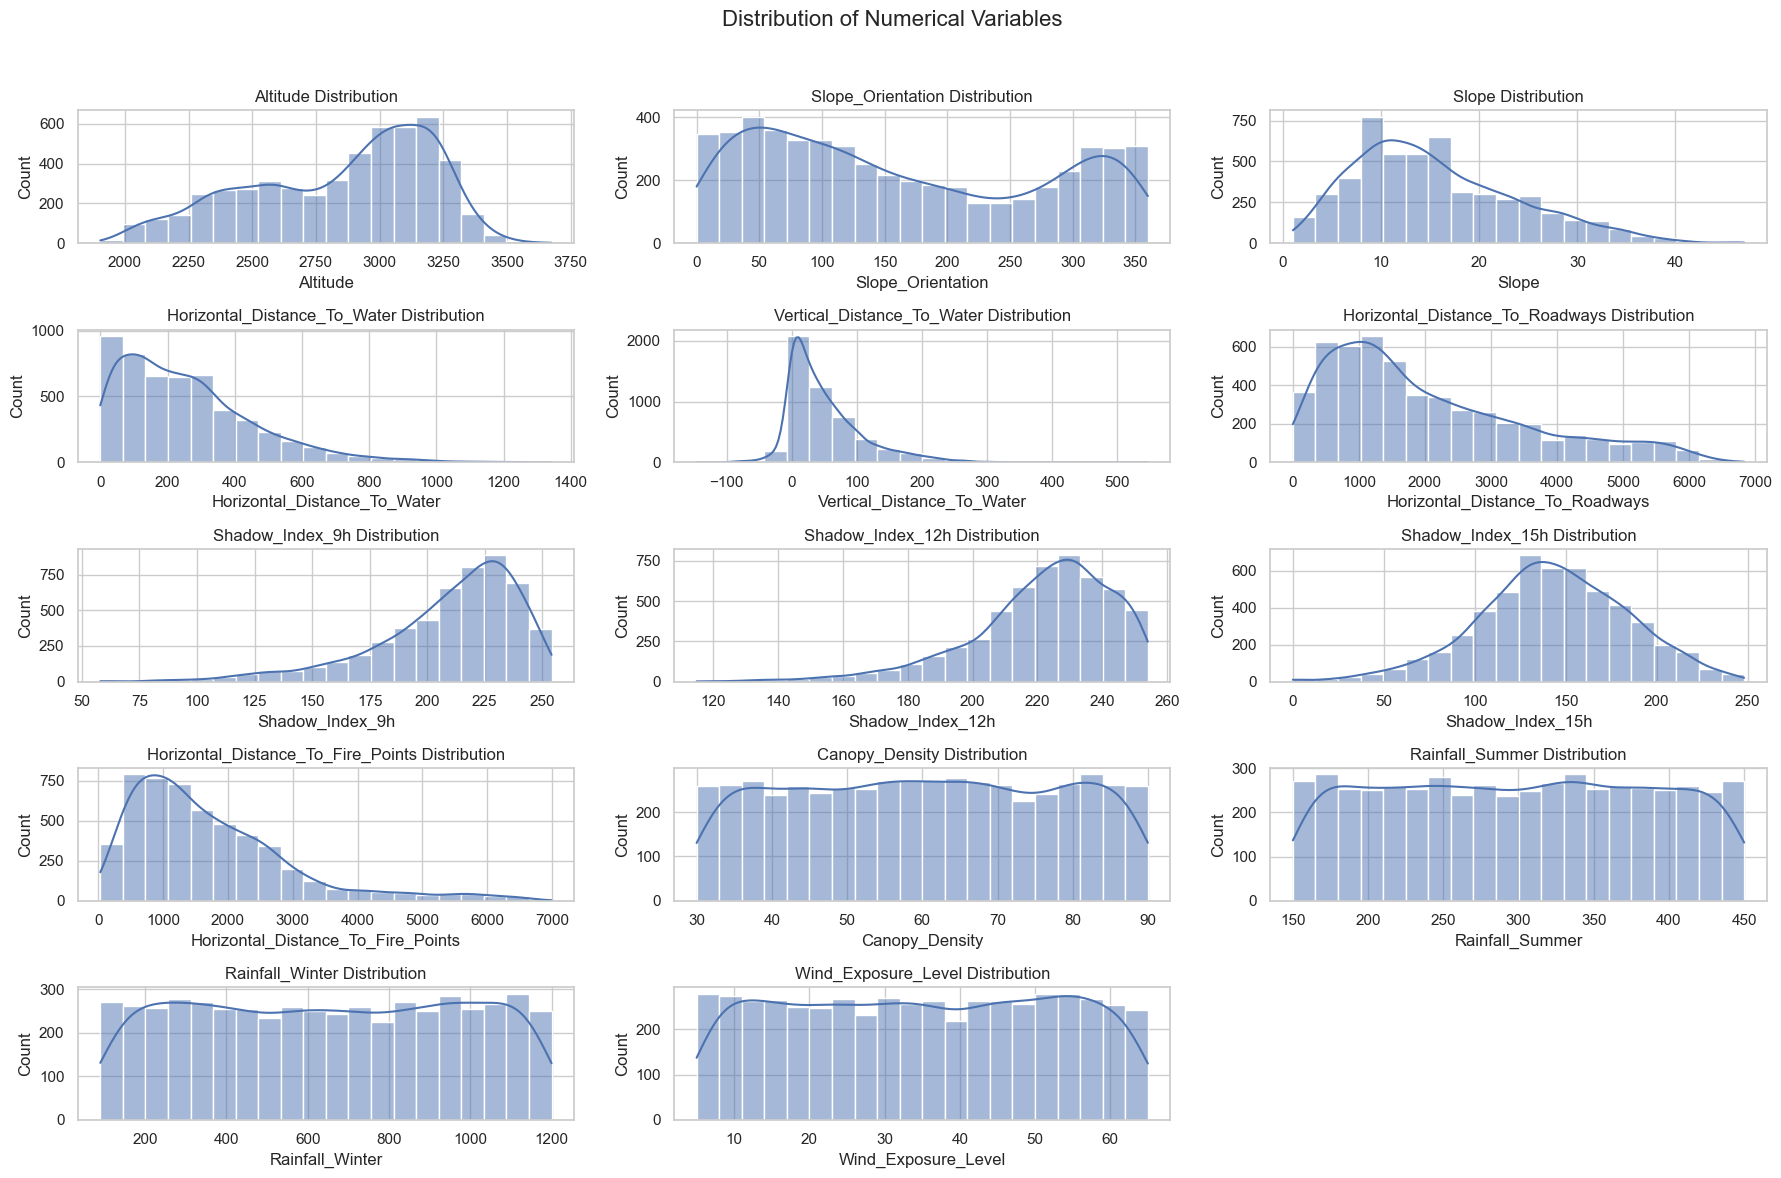

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# List of numerical columns to plot
numerical_columns = [
    'Altitude', 'Slope_Orientation', 'Slope', 
    'Horizontal_Distance_To_Water', 'Vertical_Distance_To_Water', 
    'Horizontal_Distance_To_Roadways', 'Shadow_Index_9h', 
    'Shadow_Index_12h', 'Shadow_Index_15h', 
    'Horizontal_Distance_To_Fire_Points', 'Canopy_Density', 
    'Rainfall_Summer', 'Rainfall_Winter', 'Wind_Exposure_Level'
]

# Set up the subplots, adjusting number of rows and columns to fit all features
num_plots = len(numerical_columns)
cols = 3
rows = num_plots // cols + (num_plots % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(18, 12))
fig.suptitle('Distribution of Numerical Variables', fontsize=16)

# Plot histograms for each numerical feature
for i, col in enumerate(numerical_columns):
    row = i // cols
    col_idx = i % cols
    sns.histplot(df[col], kde=True, bins=20, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'{col} Distribution')

# Hide any unused subplots
for i in range(num_plots, rows * cols):
    fig.delaxes(axes.flat[i])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Here we can see distribution of various numerical variables using histograms. Each plot visualizes how the data is spread for features such as Altitude, Slope Orientation, Slope, and more. The density curves (where applicable) help indicate the shape of these distributions. For instance, Altitude and Slope Orientation exhibit fairly normal distributions, while variables like Vertical Distance to Water show skewed distributions.



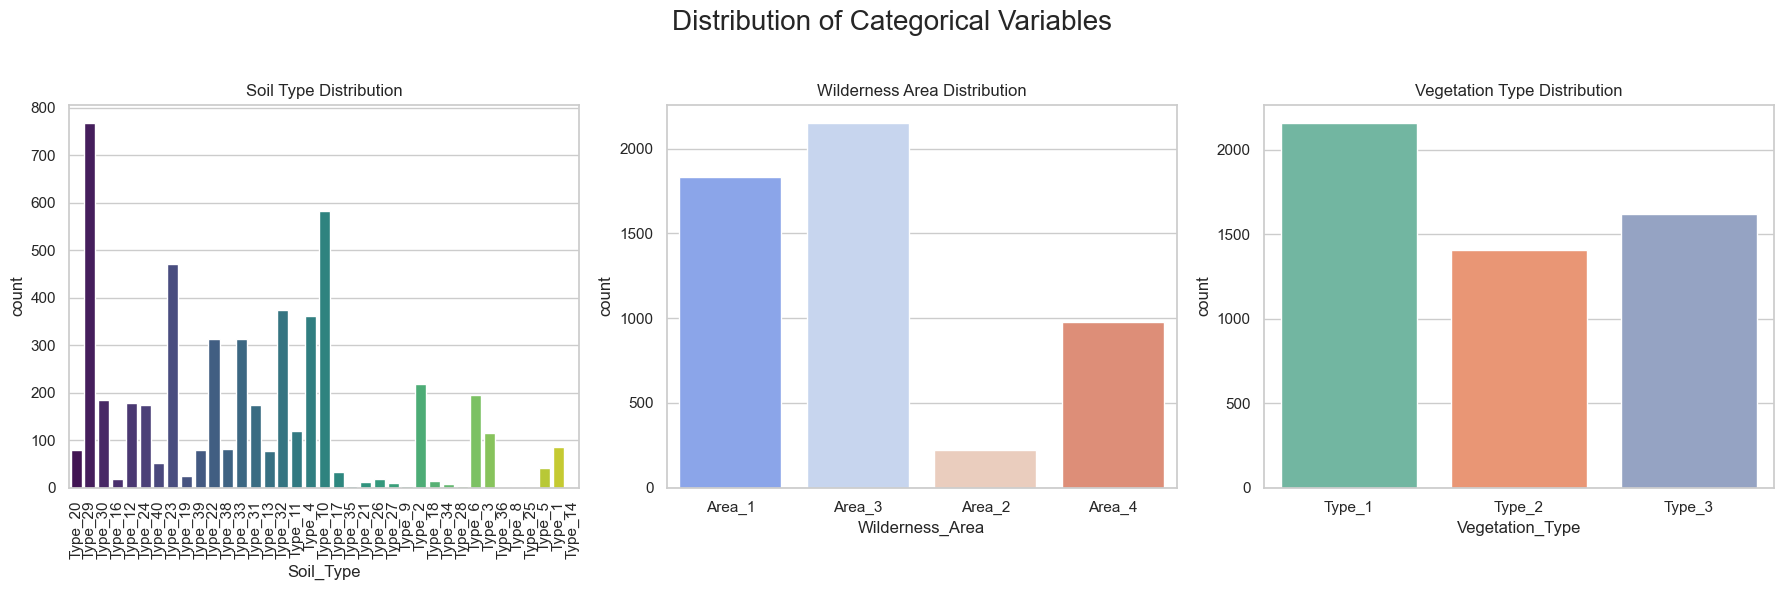

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the visualizations
sns.set(style="whitegrid")

# Plot bar plots for categorical variables
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Distribution of Categorical Variables')

# Plot for Soil_Type
sns.countplot(x='Soil_Type', data=df, ax=axes[0], palette='viridis')
axes[0].set_title('Soil Type Distribution')
axes[0].tick_params(axis='x', rotation=90)  # Rotate labels if needed

# Plot for Wilderness_Area
sns.countplot(x='Wilderness_Area', data=df, ax=axes[1], palette='coolwarm')
axes[1].set_title('Wilderness Area Distribution')

# Plot for Vegetation_Type
sns.countplot(x='Vegetation_Type', data=df, ax=axes[2], palette='Set2')
axes[2].set_title('Vegetation Type Distribution')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Graphs for bivariate analysis, to see scatter plots between the numerical variables and target variable to observe any trends or patters.

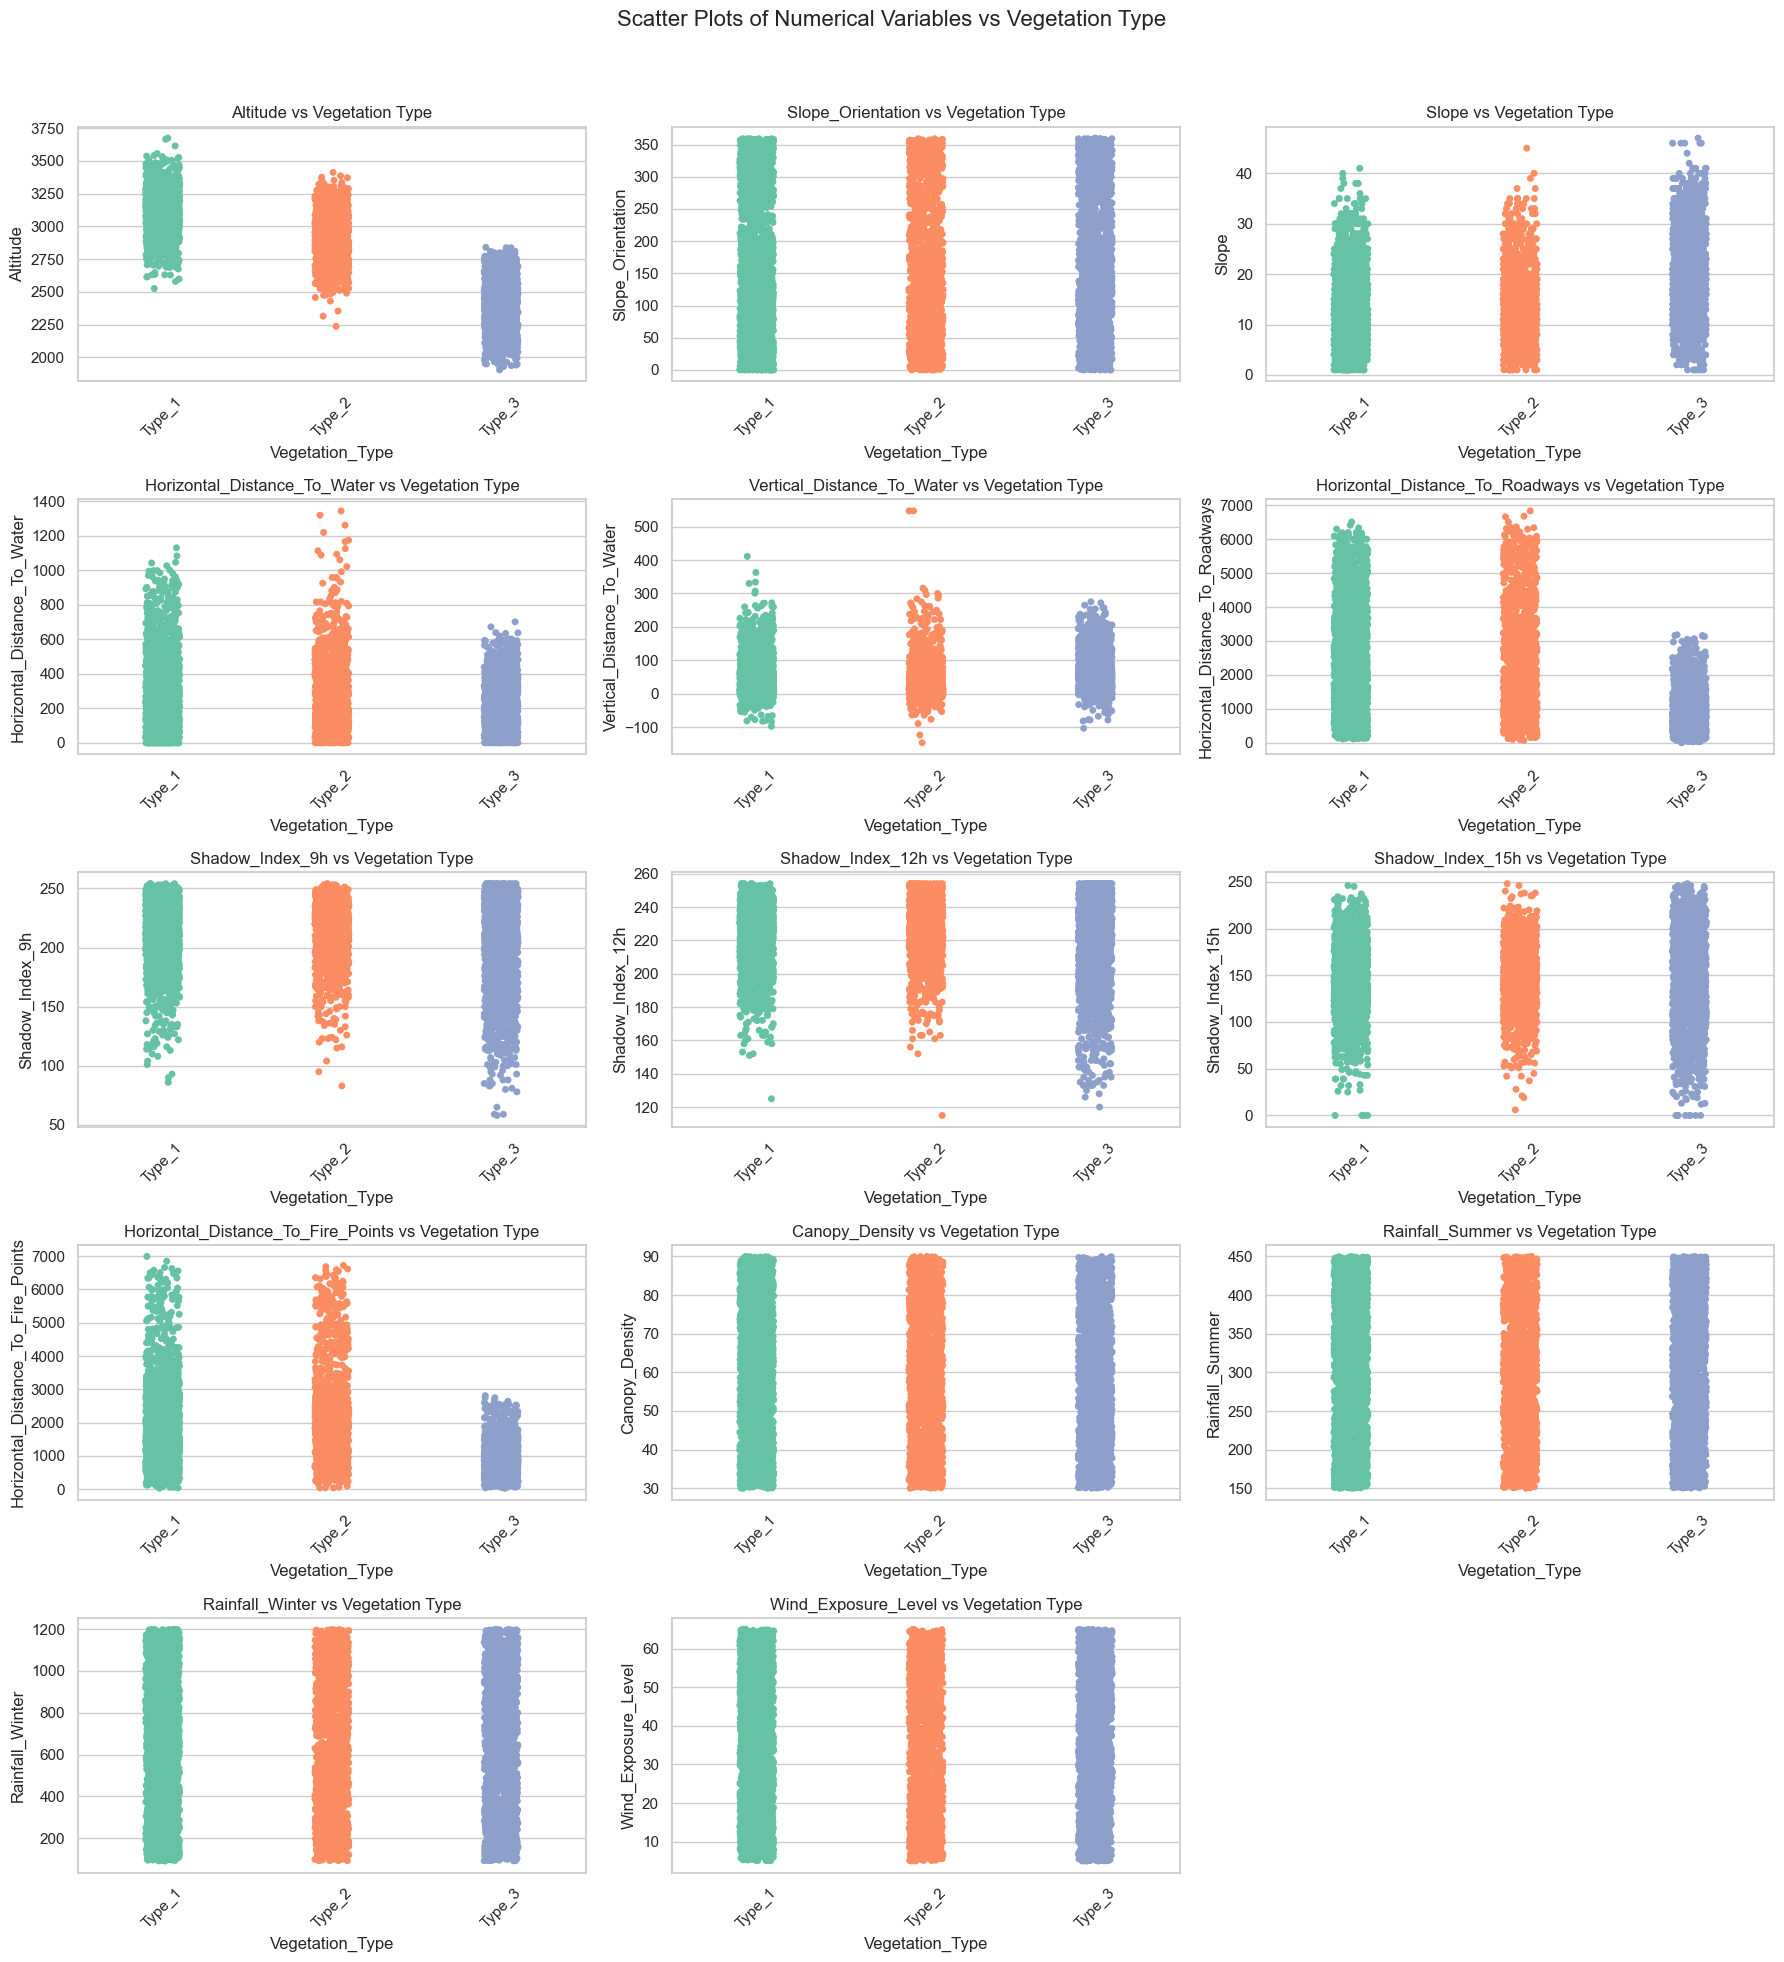

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the visualizations
sns.set(style="whitegrid")

# List of numerical variables to plot against Vegetation_Type
numerical_columns = [
    'Altitude', 'Slope_Orientation', 'Slope', 
    'Horizontal_Distance_To_Water', 'Vertical_Distance_To_Water', 
    'Horizontal_Distance_To_Roadways', 'Shadow_Index_9h', 
    'Shadow_Index_12h', 'Shadow_Index_15h', 
    'Horizontal_Distance_To_Fire_Points', 'Canopy_Density', 
    'Rainfall_Summer', 'Rainfall_Winter', 'Wind_Exposure_Level'
]

# Set up the subplots grid
num_plots = len(numerical_columns)
cols = 3  # Number of columns
rows = num_plots // cols + (num_plots % cols > 0)  # Number of rows

fig, axes = plt.subplots(rows, cols, figsize=(18, 4 * rows))
fig.suptitle('Scatter Plots of Numerical Variables vs Vegetation Type', fontsize=16)

# Plot each numerical variable vs Vegetation_Type
for i, col in enumerate(numerical_columns):
    row = i // cols
    col_idx = i % cols
    sns.stripplot(x='Vegetation_Type', y=col, data=df, ax=axes[row, col_idx], jitter=True, palette='Set2')
    axes[row, col_idx].set_title(f'{col} vs Vegetation Type')
    axes[row, col_idx].tick_params(axis='x', rotation=45)  # Rotate x labels for readability

# Hide any empty subplots (if any)
for i in range(num_plots, rows * cols):
    fig.delaxes(axes.flat[i])

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


While most of these scatter plots do not reveal substantial differences across the variables for different Vegetation Types, we can observe that the Altitude vs Vegetation Type plot stands out with the most noticeable variation. Vegetation Types 1 and 2 seem to have similar altitudes, whereas Vegetation Type 3 is distinctly associated with a lower altitude range. This suggests that Altitude may be an important factor differentiating Vegetation Type 3 from the others.

For the other variables, such as Slope Orientation, Slope, and various Shadow Index values, the distributions are relatively similar across the vegetation types, offering less informative differentiation.

Box plots for comparing categorical variables.

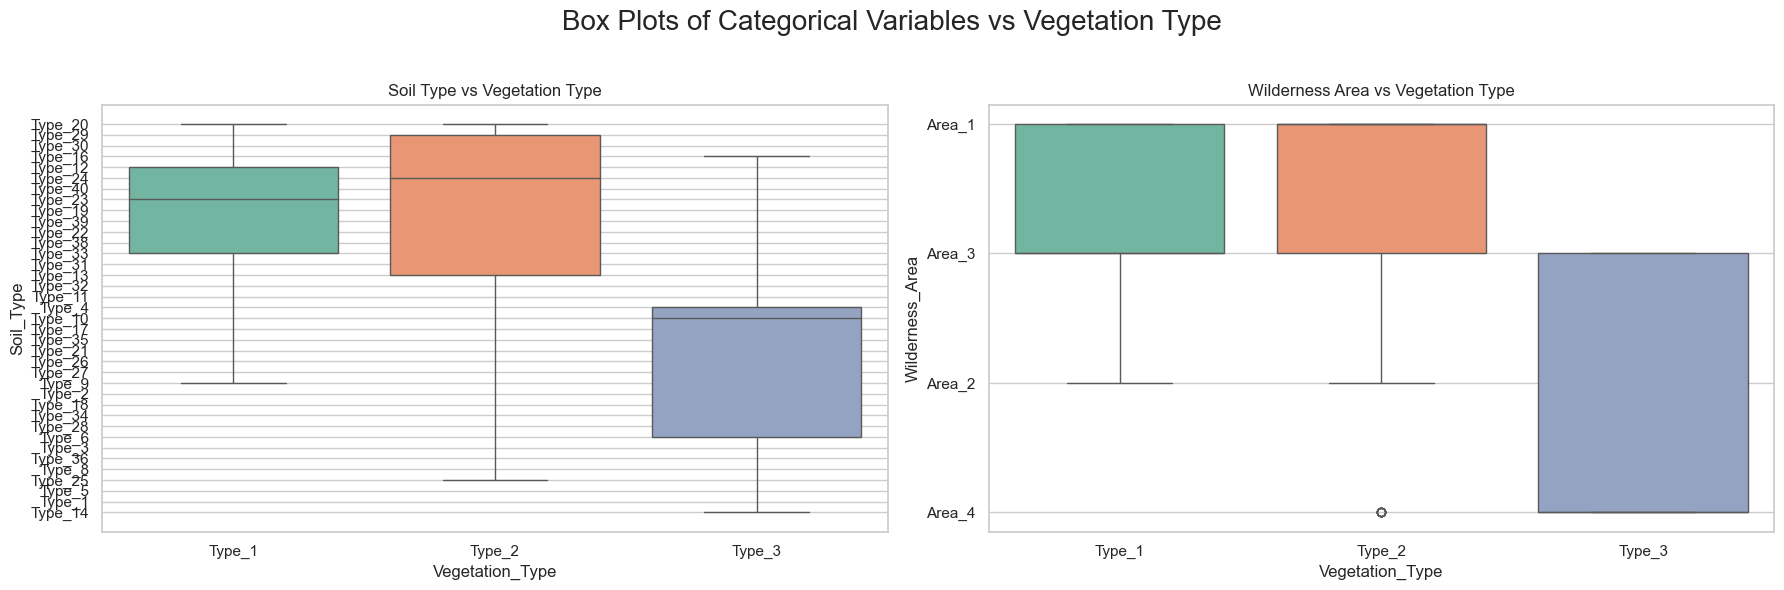

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the visualizations
sns.set(style="whitegrid")

# Plot box plots for categorical variables vs Vegetation_Type
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('Box Plots of Categorical Variables vs Vegetation Type')

# Box plot for Soil_Type vs Vegetation_Type
sns.boxplot(x='Vegetation_Type', y='Soil_Type', data=df, ax=axes[0], palette='Set2')
axes[0].set_title('Soil Type vs Vegetation Type')

# Box plot for Wilderness_Area vs Vegetation_Type
sns.boxplot(x='Vegetation_Type', y='Wilderness_Area', data=df, ax=axes[1], palette='Set2')
axes[1].set_title('Wilderness Area vs Vegetation Type')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In the graphs, we observe the relationship between Soil Type and Vegetation Type. The first two vegetation types (Type 1 and Type 2) show similar distributions for the various soil types. However, Vegetation Type 3 exhibits a distinct soil type distribution, indicating that it occurs in areas with different soil characteristics.

For the Wilderness Area vs Vegetation Type plot, we see that Vegetation Types 1 and 2 share similar wilderness areas (Areas 1, 2, and 3). In contrast, Vegetation Type 3 appears to be predominantly associated with Area 4, suggesting a different wilderness distribution compared to the other vegetation types.